# Observations and Insights 

# Desiree Herschberger

1. Capomulin is the most effective treatment regimen, producing results in reducing tumor volume
2. Weight and tumor volume have a definitive correlation. The fatter the mouse the fatter tumor.
3. Infubinol data produces the only outlier
4. Capomulin had the greatest number of trials, followed closely by Ramicane
5. Study is comprised of an almost even distribution of male and female mice. No obvious correlation go how gender effects results

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
df_merged = pd.merge(study_results, mouse_metadata, on='Mouse ID', how='left')
 
# Display the data table for preview
df_merged.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [4]:
# Checking the number of mice.
len(set(df_merged['Mouse ID'])) 

249

In [5]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
df=df_merged
#gives us a set of duplicates
set_dups = set(df.loc[df.duplicated(subset=['Mouse ID','Timepoint']), "Mouse ID"])
print(set_dups)

{'g989'}


In [6]:
# Optional: Get all the data for the duplicate mouse ID. 
df=df_merged
#identify duplicate mouse from set variable to id mouse data
dup_mouse_data = df.loc[df['Mouse ID'].isin(set_dups)]
dup_mouse_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
df=df_merged
#dropping dups by using set(created to id dup mouse)
df_clean = df_merged[ ~df_merged['Mouse ID'].isin(set_dups) ]
#df_clean

In [8]:
# Checking the number of mice in the clean DataFrame.
len(set(df_clean['Mouse ID']))

248

## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

#group, aggrigate, combine
tumor_grp = df_clean['Tumor Volume (mm3)'].groupby(df_clean['Drug Regimen'])
df_sum_stats = pd.DataFrame({
        'mean': tumor_grp.mean(),
        'median': tumor_grp.median(),
        'var': tumor_grp.var(),
        'std': tumor_grp.std(),
        'sem': tumor_grp.sem(), })

df_sum_stats

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
tumor_grp.agg(['mean', 'median','var','std','sem'])

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [11]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
#This question is BADLY worded.  It is my understanding you are not actually looking for the number of UNIQUE mice tested but the number of times mice were tested on each regimen.
#groupby Drug Regimen, count mice in df_clean
df = df_clean[['Mouse ID']].groupby(df_clean['Drug Regimen'], as_index=True).count() 
df

,Mouse ID
Drug Regimen,
Capomulin,230
Ceftamin,178
Infubinol,178
Ketapril,188
Naftisol,186
Placebo,181
Propriva,148
Ramicane,228
Stelasyn,181


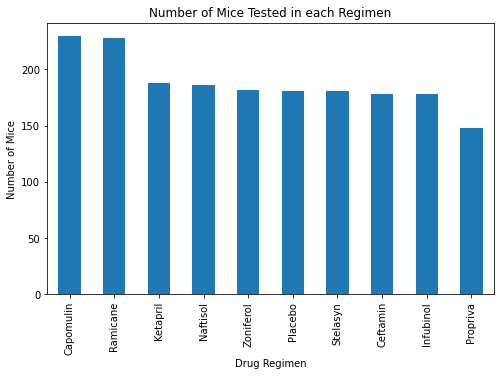

In [12]:
df.sort_values('Mouse ID', ascending=False, inplace=True)
df.plot(kind="bar", figsize=(8,5), legend=False)
#formatting
plt.title('Number of Mice Tested in each Regimen')
plt.ylabel('Number of Mice')
df_regimentests=df

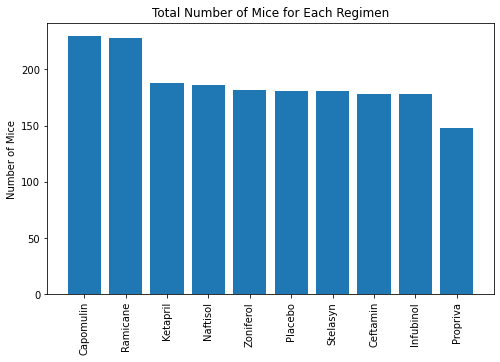

In [13]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
df=df_regimentests

plt.figure(figsize=(8,5))
plt.bar(df.index.values, df['Mouse ID'] )
plt.xticks(range(len(df)), df.index.values, rotation="vertical")
plt.title('Total Number of Mice for Each Regimen')
plt.ylabel('Number of Mice')
plt.show()

Text(0.5, 1.0, 'Gender Distrobution')

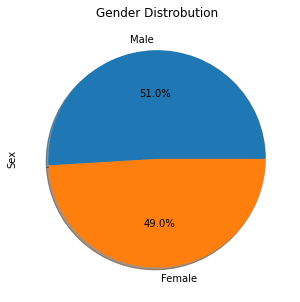

In [14]:
pie_chart = df_clean['Sex'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True, figsize=(5,5))
plt.title('Gender Distrobution')

# Generate a pie plot showing the distribution of female versus male mice using pandas
sex_count_list = list(df_clean[['Mouse ID', 'Sex']].groupby('Sex').count()['Mouse ID']) 
sex_labels = list(df_clean[['Mouse ID', 'Sex']].groupby('Sex').count().index)

df_sex = pd.DataFrame(
    {
       'Gender Count':sex_count_list
    },  index=sex_labels
)
df_sex.plot.pie(y='Gender Count', figsize=(4, 4))  

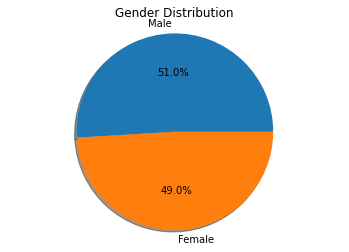

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(df_clean['Sex'].value_counts(),labels=['Male', 'Female'],autopct='%1.1f%%', shadow=True)
plt.title('Gender Distribution')
plt.axis('equal')
plt.show()

## Quartiles, Outliers and Boxplots

In [27]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin 
# Start by getting the last (greatest) timepoint for each mouse
df = df_clean[['Drug Regimen','Mouse ID','Timepoint']].groupby(['Drug Regimen','Mouse ID'], as_index=False).max()
df = df[
        df['Drug Regimen'].isin(['Capomulin','Ramicane','Infubinol','Ceftamin']) 
]
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
df = pd.merge(df_clean, df, on=['Mouse ID','Timepoint'], how="inner",suffixes=('', '_x')) 
df = df[['Drug Regimen','Mouse ID','Timepoint', 'Tumor Volume (mm3)']]
df.sort_values('Drug Regimen', inplace=True) 
df_greatest_timepoints=df


In [17]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = list(df_greatest_timepoints['Drug Regimen'].unique())
print(treatment_list)
# Create empty list to fill with tumor vol data (for plotting)
tumor_list = [] 

['Capomulin', 'Ceftamin', 'Infubinol', 'Ramicane']


In [25]:
#create data frame for each regimen
df_cap = df_greatest_timepoints.loc[df_greatest_timepoints["Drug Regimen"] == 'Capomulin',:]
df_cef= df_greatest_timepoints.loc[df_greatest_timepoints["Drug Regimen"] == 'Ceftamin',:]
df_inf = df_greatest_timepoints.loc[df_greatest_timepoints["Drug Regimen"] == 'Infubinol',:]
df_ram = df_greatest_timepoints.loc[df_greatest_timepoints["Drug Regimen"] == 'Ramicane',:]

In [76]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset 
    # Determine outliers using upper and lower bounds

#Capomulin
quartiles = df_cap['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowqurt = quartiles[0.25]
upperqurt = quartiles[0.75]
IQR = upperq-lowerq

lower_bound = lowqurt - (1.5*IQR)
upper_bound = upperqurt + (1.5*IQR)

outliers_cap = df_cap.loc[(df_cap['Tumor Volume (mm3)'] > upper_bound) |
                                    (df_cap['Tumor Volume (mm3)']  < lower_bound)]
print(f"Capomulin's possible outliers are below {round(lower_bound, 2)} or above {round(upper_bound, 2)}")
for i in range(len(outliers_cap)):
    out = outliers_cap.iloc[i]['Tumor Volume (mm3)']
    print(f" Capomulin outlliers: {round(out, 2)}")

#Ceftamin
quartiles = df_cef['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowqurt = quartiles[0.25]
upperqurt = quartiles[0.75]
IQR = upperq-lowerq

lower_bound = lowqurt - (1.5*IQR)
upper_bound = upperqurt + (1.5*IQR)

outliers_cef = df_cef.loc[(df_cef['Tumor Volume (mm3)'] > upper_bound) |
                                    (df_cef['Tumor Volume (mm3)']  < lower_bound)]
print(f"Ceftamin's possible outliers are below {round(lower_bound, 2)} or above {round(upper_bound, 2)}")
for i in range(len(outliers_cef)):
    out = outliers_cef.iloc[i]['Tumor Volume (mm3)']
    print(f" Ceftamin outlliers: {round(out, 2)}")

#Infubinol
quartiles = df_inf['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowqurt = quartiles[0.25]
upperqurt = quartiles[0.75]
IQR = upperq-lowerq

lower_bound = lowqurt - (1.5*IQR)
upper_bound = upperqurt + (1.5*IQR)

outliers_inf = df_inf.loc[(df_inf['Tumor Volume (mm3)'] > upper_bound) |
                                    (df_inf['Tumor Volume (mm3)']  < lower_bound)]
print(f"Infubinol's possible outliers are below {round(lower_bound, 2)} or above {round(upper_bound, 2)}")
for i in range(len(outliers_inf)):
    out = outliers_inf.iloc[i]['Tumor Volume (mm3)']
    print(f' Infubinol outlliers: {round(out, 2)}')

#Ramicane
quartiles = df_ram['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowqurt = quartiles[0.25]
upperqurt = quartiles[0.75]
IQR = upperq-lowerq

lower_bound = lowqurt - (1.5*IQR)
upper_bound = upperqurt + (1.5*IQR)

outliers_ram = df_ram.loc[(df_ram['Tumor Volume (mm3)'] > upper_bound) |
                                    (df_ram['Tumor Volume (mm3)']  < lower_bound)]
print(f"Ramicane's possible outliers are below {round(lower_bound, 2)} or above {round(upper_bound, 2)}")
for i in range(len(outliers_ram)):
    out = outliers_ram.iloc[i]['Tumor Volume (mm3)']
    print(f' Ramicane outlliers: {round(out, 2)}')


Capomulin's possible outliers are below 20.7 or above 51.83
Ceftamin's possible outliers are below 37.05 or above 75.97
Infubinol's possible outliers are below 42.38 or above 77.2
 Infubinol outlliers: 36.32
Ramicane's possible outliers are below 19.89 or above 52.33


In [93]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = list(df_greatest_timepoints['Drug Regimen'].unique())
print(treatment_list)
# Create empty list to fill with tumor vol data (for plotting)
#for loop
df=df_greatest_timepoints
tumor_list = [] 
for treatment in treatment_list:
    tumors = df[df['Drug Regimen']==treatment]['Tumor Volume (mm3)']
    tumor_list.append(tumors)
#print(tumor_list)

['Capomulin', 'Ceftamin', 'Infubinol', 'Ramicane']


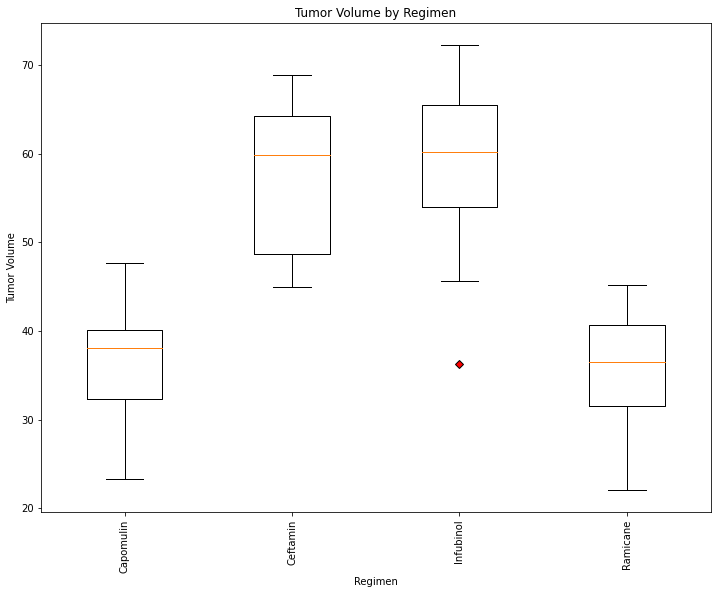

In [94]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
green_diamond = dict(markerfacecolor='r', marker='D')
fig = plt.figure(figsize =(12, 9),)  
plt.boxplot((tumor_list), flierprops=green_diamond)
plt.title('Tumor Volume by Regimen')
plt.xlabel('Regimen')
plt.xticks([1,2,3, 4],treatment_list, rotation="vertical")
plt.ylabel('Tumor Volume')
plt.show()

## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

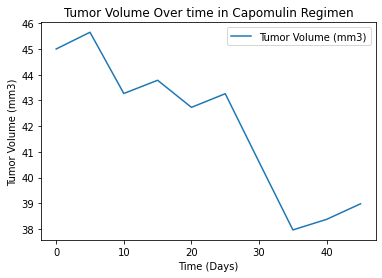

In [22]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
df=df_clean[df_clean['Mouse ID']=='b128'] 
df.plot.line(x='Timepoint', y='Tumor Volume (mm3)')
plt.title('Tumor Volume Over time in Capomulin Regimen')
plt.xlabel('Time (Days)')
plt.ylabel('Tumor Volume (mm3)')

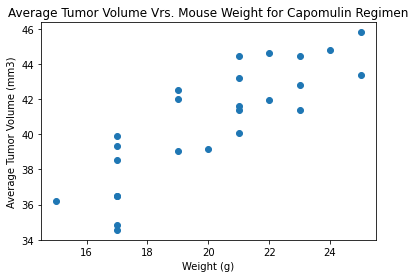

In [23]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
df=df_clean[df_clean['Drug Regimen']=='Capomulin'] 
df=df.groupby('Mouse ID')  
plt.scatter( df['Weight (g)'].mean() , df['Tumor Volume (mm3)'].mean() ) 
plt.title('Average Tumor Volume Vrs. Mouse Weight for Capomulin Regimen')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show() 

## Correlation and Regression

In [95]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
df=df_clean[df_clean['Drug Regimen']=='Capomulin'] 
df=df.groupby('Mouse ID').mean()  
correlation = st.pearsonr(df['Tumor Volume (mm3)'], df['Weight (g)'])
print(f"The correlation between both factors is {round(correlation[0],2)}")
df_capo_tumor_avg = df

The correlation between both factors is 0.84


The r-squared is: 0.7088568047708717


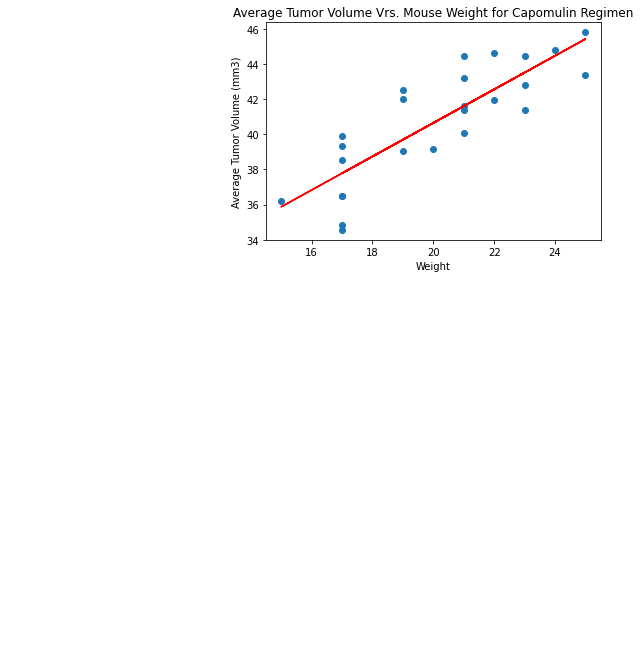

In [96]:
df=df_capo_tumor_avg
#reshape variables 
tumor_volume = df['Tumor Volume (mm3)']
mouse_wght = df['Weight (g)']

#Linear regression model
x_values = mouse_wght
y_values = tumor_volume
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title('Average Tumor Volume Vrs. Mouse Weight for Capomulin Regimen')
plt.xlabel('Weight')
plt.ylabel('Average Tumor Volume (mm3)')
print(f"The r-squared is: {rvalue**2}")
plt.show()